In [2]:
# Change this to the number of cores you have available
%env NUMBA_NUM_THREADS=4

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from chebysolve import largest_eigenpair

env: NUMBA_NUM_THREADS=4


In [3]:
long_axis_size = 10_000
short_axis_size = 25

# Initialise a random generator
random_seed = 12345
rng = np.random.default_rng(random_seed)

# Sample matrix whose product AA^T we want to eigensolve
# Replace this with your data
matrix = rng.integers(10, size=(long_axis_size, short_axis_size)).astype('float32')

# Normalised random initial vector
initial_eigenvector_estimate = rng.random(long_axis_size, dtype='float32')

In [7]:
eigenvalue_estimates_with_errors, eigenvector_estimate, converged = largest_eigenpair(
    matrix, initial_eigenvector_estimate
)

eigenvalue_estimate = eigenvalue_estimates_with_errors[-1][0]
eigenvalue_error_estimate = eigenvalue_estimates_with_errors[-1][1]

if converged:
    print("Converged at largest eigenvalue", eigenvalue_estimate, 
          "±", eigenvalue_error_estimate, "after", 
          len(eigenvalue_estimates_with_errors), "iterations.")
    print("Eigenvector available in `new_eigenvector_estimate`.")
else:
    print("Failed to converge after", len(eigenvalue_estimates_with_errors), "iterations.")
    print("Last estimate was", eigenvalue_estimate, "±", eigenvalue_error_estimate, ".")
    print("Eigenvector estimate available in `new_eigenvector_estimate`.")


Converged at largest eigenvalue 5149798.0 ± 2.6606154 after 4 iterations.
Eigenvector available in `new_eigenvector_estimate`.


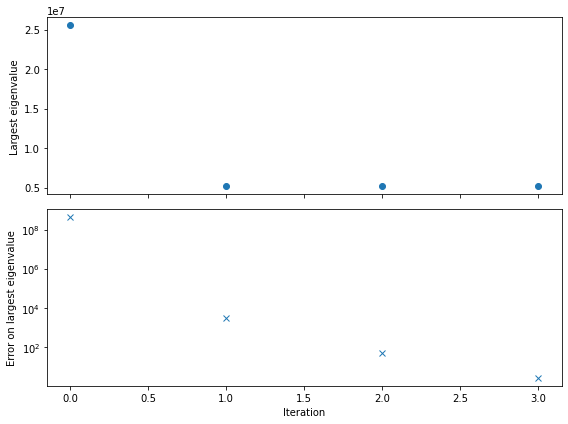

In [9]:
# Plot the history of the estimate

fig, axes = plt.subplots(nrows=2, sharex=True, figsize=(8, 6))

eigenvalue_estimates, eigenvalue_error_estimates = list(
    zip(*eigenvalue_estimates_with_errors)
)

# Skip first iteration because the error bar is huge
axes[0].plot(
    *zip(*enumerate(eigenvalue_estimates)),
    marker='o',
    linestyle='None'
)
axes[0].set_ylabel('Largest eigenvalue')

axes[1].plot(
    *zip(*enumerate(eigenvalue_error_estimates)),
    marker='x',
    linestyle='None'
)
axes[1].set_ylabel('Error on largest eigenvalue')
axes[1].set_yscale('log')
axes[1].set_xlabel('Iteration')

fig.tight_layout()
plt.show()

In [7]:
%timeit iterate_vector(matrix, old_eigenvector_estimate)

14.8 s ± 104 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [9]:
import sys
 
print(sys.getsizeof(matrix))
print(sys.getsizeof(old_eigenvector_estimate))



2400112
800096
